# Aula 3 - Estatística parte 2: probabilidade e amostragem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats, special, math

random_state_geral = 101

## 1 _Dataset_ utilizado

Vamos usar o mesmo _dataset_ da parte 1 de estatística, criado a partir dos microdados do PNAD 2015.

In [2]:
df = pd.read_csv("dados/aula2_pnad_2015.csv")
df.columns = [i.replace(' ', '_').lower() for i in df.columns]
df

,uf,sexo,idade,cor,anos_de_estudo,renda,altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## 2 Distribuição de probabilidades

### 2.1 Distribuição Binomial

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas **duas categorias**. Estas categorias somadas representam todo o espaço amostral (número de ocorrências/combinações possíveis de um experiemnto), sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Para entender melhor o que é espaço amostral vamos pensar no lançamento de uma moeda como exemplo. Quando a lançamos para o alto, podemos ter como resultado Coroa ou Cara, ou seja, temos duas possibilidades de resultado e dizemos que o espaço amostral desse experimento tem tamanho 2, sendo considerado um evento binomial.

Outro exemplo simples é o lançamento de um dado normal, com seis faces. Se os resultados possíveis forem quaisquer um dos lados cairem virados para cima, então o espaço amostral do experimento é de tamanho 6, não sendo classificado como binomial. Agora, se os resultados possíveis forem faces com número par ou ímpar, então passamos a ter um evento binomial.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**. Podemos calcular a probabilidade de obter sucesso em $k$ de $n$ ensaios com a fórmula:

$$ P(k)=\binom{n}{k} p^k q^{n-k} $$

Onde:

- $\binom{n}{k}$ é o número de combinações possíveis de $n$ objetos, tomados $k$ a cada vez. Lê-se _"combinação de n k a k"_
- $p$ a probabilidade de sucesso;
- $q = (1 - p)$ a probabilidade de fracasso;
- $n$ o número de eventos estudados; e
- $k$ é o número de eventos desejados que tenham sucesso

Voltando ao exemplo da moeda, a probabilidade de sucesso para lançamentos que resultem em Cara é de 50% de chances, já que existem apenas dois resultados possíveis

#### 2.1.1 Experimento Binomial

As características que definem um experimento binomial são:

1. Realização de $n$ ensaios idênticos.
2. Os ensaios são independentes.
3. Somente dois resultados são possíveis, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.
4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio.

#### 2.1.2 Média da distribuição binomial

O _valor esperado_ ou a _média da distribuição binomial_ é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

$$\mu = n \; p$$

#### 2.1.3 Desvio padrão da distribuição binomial

O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

$$\sigma = \sqrt{n \; p \; q}$$

#### 2.1.4 Combinações

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

$$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

$$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
$$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

$$0! = 1$$

#### 2.1.5 Exemplos

##### 2.1.5.1 Mega Sena

Em um volante de loteria da Mega Sena temos um total de **60 números** para escolher onde a aposta mínima é de **seis números**. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas **um jogo**. Para isso precisamos saber quantas **combinações de seis números podem ser formadas com os 60 números disponíveis**.

$$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [3]:
# usando função fatorial dos módulos math (nativo do python, do scipy ou numpy)
# import math
# from scipy import math
# from numpy import math
math.factorial(60) / ( math.factorial(6) * math.factorial(60-6) )

50063860.0

In [4]:
# numero de combinações possíveis
combinacoes_megasena = special.comb(60, 6)
combinacoes_megasena

50063860.0

In [5]:
# probabilidade de acertar na mega-sena com um bilhete
probabilidade_megasena = 1 / combinacoes_megasena
probabilidade_megasena

1.997448858318156e-08

In [6]:
f"{probabilidade_megasena:.23f}"

'0.00000001997448858318156'

##### 2.1.5.2 Concurso para cientista de dados

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**: obtenha a (a) probabilidade deste candidato **acertar 5 questões** e também a (b) probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

O primeiro passo é verificar se essa situação se caracteriza como um evento binomial

1. _Realização de $n$ ensaios idênticos_: no caso o evento estudado é o resultado da questão e temos dez questões na prova. ou seja, o experimento é composto por dez ensaios, então $n=10$ 

In [7]:
# numero de ensaios n
n = 10
n

10

2. _Os ensaios são independentes_: Sim. Cada questão possui três alternativas, e a escolha por uma opção não influência em nada a opção escolhida em outra questão.

3. _Somente dois resultados são possíveis_: Sim. Os resultados possíveis são ACERTAR ou ERRAR a questão.

4. _A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio_: Este requisito também é satisfeito, já que todas as questões possuem três alternativas e apenas uma delas é correta.

In [8]:
# probabilidade de sucesso
alternativas_por_questao = 3
p = 1 / alternativas_por_questao
p

0.3333333333333333

In [9]:
# probabilidade de fracasso
q = 1 - p
q

0.6666666666666667

Agora vamos calcular as probabilidades pedidas, começando pelo item _(a) probabilidade $P(5)$ deste candidato **acertar 5 questões**_. Aqui vemos que o número de eventos em que esperamos obter sucesso é $k=5$, e como ja temos as outras grandezas, nos resta apenas aplicar a fórmula da probabilidade. Primeiro fazemos "na mão" e depois usamos a função `binom.pmf()` (_Probability mass function_) do módulo `stats` do pacote `scipy`:

In [10]:
#  total de eventos para obter sucesso
k = 5
k

5

In [11]:
# calculando "na mao"
probabilidade_5 = special.comb(n, k) * (p ** k) * (q ** (n-k))
probabilidade_5

0.13656454808718185

In [12]:
# calculando direto
probabilidade_5 = stats.binom.pmf(n=n, k=k, p=p)
probabilidade_5

0.13656454808718183

_(b) probabilidade deste candidato passar para a próxima etapa do processo seletivo_. Sabendo que a nota de corte é igual a 5, devemos considerar os casos em que o candidato acerte 5, 6, 7, 8, 9 e 10 questões, em todos esses cenários ele será aprovado. Portanto, devemos calcular a probabilidade para cada um desses cenários para obter a probabilidade de aprovação:

$$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

In [13]:
k_0 = k
probabilidade_passar = 0
for i in range(k_0, n+1):
    probabilidade_i = stats.binom.pmf(n=n, k=i, p=p)
    probabilidade_passar += probabilidade_i
    print(f"P({i}) = {probabilidade_i}")

print(f"\nP(acertar >= {k_0}) = {probabilidade_passar}")

P(5) = 0.13656454808718183
P(6) = 0.0569018950363258
P(7) = 0.016257684296093082
P(8) = 0.0030483158055174477
P(9) = 0.000338701756168606
P(10) = 1.6935087808430265e-05

P(acertar >= 5) = 0.2131280800690952


Se verificarmos a documentação do objeto [`binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) vamos encontrar algumas formas mais simples de fazer isso. A primeira que vamos citar é que podemos passar uma lista no parâmetro `k` da função `binom.pmf()`. O retorno será um _array_ com a probabilidade para cada k e então podemos apenas somar os elementos do _array_:

In [14]:
stats.binom.pmf(n=n, k=[5, 6, 7, 8, 9, 10], p=p)

array([1.36564548e-01, 5.69018950e-02, 1.62576843e-02, 3.04831581e-03,
       3.38701756e-04, 1.69350878e-05])

In [15]:
# ou aproveitando as variáveis criados para o loop
stats.binom.pmf(n=n, k=[range(k_0, n+1)], p=p).sum()

0.2131280800690952

Também podemos calcular a probabilidade comulativa com a função `binom.cdf()` (_Cumulative distribution function_):

In [16]:
# probabilidade comulativa de k=0 até k=4
stats.binom.cdf(n=n, k=4, p=p)

0.7868719199309049

In [17]:
# probabilidade comulativa de k=0 até k=10
stats.binom.cdf(n=n, k=10, p=p)

1.0

Perceba que os eventos $k=[0,4]$ são exatamente os que não quero, portanto, podemos subtrair a probabilidade desses eventos de $1$ para obter a probabilidade dos eventos que queremos:

In [18]:
# probabilidade comulativa de k=5 até k=10
1 - stats.binom.cdf(n=n, k=4, p=p)

0.21312808006909512

E por último temos a função `sf()` (_Survival function_), que faz exatamente a conta de `1 - cdf`:

In [19]:
stats.binom.sf(n=n, k=4, p=p)

0.21312808006909517

##### 2.1.5.3 Gincana

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

Primeiro devemos entender que a pergunta sendo feita na verdade é: _"**em média**, quantas equipes deverão ser formadas por oito mulheres e quatro homens"_. O que precisamos descobrir é a probabilidade de **uma equipe** ser formada por oito mulheres, e a partir disso poderemos calcular a média.

Primeiro vamos definir que o experimento se trata da **seleção de pessoas para uma equipe**, cada pessoa podendo ser do sexo **feminimo** ou **masculino** (espaço amostral) e cada equipe com **doze** integrantes (número de ensaios).

Podemos assumir que a proporção de participantes do sexo feminino da última gincana vai se manter. Então sabemos que a probabilidade de se escolher uma participante mulher sobre um homem é de 60%. Como foi informado que a proporção de participantes do sexo feminino da última gincana foi de 60%, 

In [20]:
# número de ensais
n = 12
n

12

In [21]:
# probabilidade de sucesso (escolher uma mulher)
p = 0.6
p

0.6

In [22]:
# numero de eventos desejados (integrante é mulher)
k = 8
k

8

In [23]:
probabilidade_8mulheres = stats.binom.pmf(n=n, k=k, p=p)
probabilidade_8mulheres

0.2128409395199996

Agora sabemos que a chance de uma equipe ser formada por oito mulheres e 4 homens é de 21%. Para saber em média quantas equipes (das trinta incritas) vão ter essa configuração, podemos calcular a "média da distribuição binomial" $\mu$ usando a fórmula $\mu = n \; p$, onde $n$ é número de experimentos realizados (número de equipes) e $p$ a chance de ocorrência do evento.

In [24]:
equipes_8mulheres = 30 * probabilidade_8mulheres
equipes_8mulheres

6.385228185599988

Ou seja, em média 6,4 equipes vão ser compostas por oito mulheres e quatro homens.

In [25]:
50 * stats.binom.pmf(n=3, k=2, p=0.22)

5.662799999999999

### 2.2 Distribuição de Poisson

É empregada para descrever o número de ocorrências em um intervalo específico, que pode ser de tempo ou espaço. Os eventos são caracterizados pela possibilidade de contagem dos sucessos e a impossibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam no drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados ao longo de um trecho de estrada etc. Note que em nenhum desses exemplos posso contar os fracassos, o número de clientes que não entraram na loja ou o número de acidentes que não ocorreram no trecho.

A probabilidade de que ocorram $k$ sucessos em um determinado intervalo pode ser calculada através da fórmula: 

$$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

- $e$ é o número de Euler, uma constante cujo valor aproximado é $2,718281828459045$;
- $\mu$ representa o número médio de ocorrências em um determinado intervalo (de tempo ou espaço); e
- $k$ é número de sucessos no intervalo desejado.

#### 2.2.1 Experimento de Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado
2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos
3. A probabilidade de uma ocorrência é a mesma em intervalos de igual tamanho.

#### 2.2.2 Média da distribuição de Poisson

$$\mu$$

#### 2.2.3 Desvio padrão da distribuição de Poisson

$$\sigma = \sqrt{\mu}$$

#### 2.2.4 Exemplo - _Delivery_

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

A partir do texto acima vemos que o evento de sucesso é o pedido realizado, o intervalo estudado é o período de 1 hora e são realizados em média 20 pedidos por hora.

In [26]:
# número médio de ocorrências de sucesso (pedidos) no intervalo avaliado (ao longo de 1 hora)
mu = 20
mu

20

In [27]:
# número de ocorrências de sucesso (pedidos) que queremos avaliar
k = 15
k

15

In [28]:
# numero de Euler
np.e

2.718281828459045

Agora que conhecemos o valor dos parâmetros necessários para calcular a probabilidade, podemos fazer a conta. Primeiro faremos na mão e depois usando a função `pmf()` (_Probability mass function_) do objeto [`poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) do módulo `stats` do pacote `scipy`:

In [29]:
# probabilidade de obter k sucessos no intervalo com média de eventos mu
p_15pedidos = ((np.e**(-mu)) * (mu**k)) / np.math.factorial(k)
p_15pedidos

0.0516488535317584

In [30]:
# usando uma funçao do objeto poisson, que abstrai todo cálculo
p_15pedidos = stats.poisson.pmf(mu=mu, k=k)
p_15pedidos

0.05164885353175814

In [31]:
stats.poisson.pmf(mu=20, k=25)

0.04458764910826764

### 2.3 Distribuição Normal

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

<img src='https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/formacao_ds/imagens/aula3_2-3_dist_normal_1_form.png' width='35%'>

#### 2.3.1 Características da distribuição normal

1. É simétrica em torno da média, ou seja, partindo da média a curva tem o mesmo tamanho para as duas direções;
2. A área sob a curva corresponde à proporção 1 ou 100%;
3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor (redundante com item 1?);
4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;
5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão (tem uma relação formal pra isso!? colocar gráfico);
6. A distribuição é definida por sua média e desvio padrão;
7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

#### 2.3.2 Probabilidade

A função da _densidade de probabilidade_ da distribuição normal é

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $$

Onde:

- $x$ é variável normal;
- $\sigma$ o desvio padrão; e
- $\mu$ é a média.

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo:


<img src='https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/formacao_ds/imagens/aula3_2-3_dist_normal_2_area_definida.png' width='35%'>

Para obter a área acima basta calcular a integral da função para o intervalo determinado, que fica:

$$ P(L_i < x < L_s) ] \; = \; \int_{L_i}^{L_s} \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma} \right)^2} dx $$

Onde:

- $x$ é a variável normal
- $\sigma$ o desvio padrão
- $\mu$ a média
- $L_i$ o limite inferior
- e $L_s$ o limite superior

#### 2.3.3 Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas. Como a distribuição de uma variável aleatória é definida por sua média e desvio padrão, cada distribuição vai ter um formato diferente, umas mais achatadas e outras mais compridas. Então usamos o recurso das tabelas padronizadas, que já possuem os valores das probabilidades.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável normal padronizada $Z$. Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

$$Z(x) = \frac{x-\mu}{\sigma}$$

Onde $x$ é a variável normal com média $\mu$ e desvio padrão $\sigma$.

##### 2.3.3.1 Construindo a tabela padronizada

Vamos contruir uma tabela padronizada que fornecerá a área sob a curva entre _$-\infty$ e $Z$ desvios padrão acima da média_. Fazendo $\mu = 0$ temos

$$ Z(x) = \frac{x}{\sigma} \;\;\; \Rightarrow \;\;\; x = Z \sigma $$

<img src='https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/formacao_ds/imagens/aula3_2-3_dist_normal_3_area_padronizada.png' width='30%'>

Com essa tabela podemos calcular "diretamente" apenas para para valores de $Z$ com $ x > \mu$. Mas como a distribuição é simétrica, se o valor de $X$ que estamos interessados ficar a esquerda do ponto médio, podemos sempre passar o valor correspondente simétrico ao qual estamos interessados (a direita) seguir normalmente.

In [32]:
tabela_normal_padronizada = pd.DataFrame(
    data=[], 
    index=[f"{i/100:0.2f}" for i in range(0, 400, 10)],
    columns = [f"{i/100:0.2f}" for i in range(0, 10)]
).rename_axis('Z', axis='columns')

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = f"{stats.norm.cdf(Z):0.4f}"

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


#### 2.3.4 Exemplo - Qual sua altura?

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

1. probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.
2. probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    
3. probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

##### 2.3.4.1 Menos de 1,8 m

<img style='float: left' src='https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/formacao_ds/imagens/aula3_2-3_dist_normal_ex_a.png' width='30%'>

Sabendo que a média é 1,70 m posso afirmar que a probabilidade até esse ponto no gráfico é de 0,5. Logo, seria necessário apenas descobrir a área abaixo da curva com os limites de 1,7 até 1,8 metros.

Como a tabela padronizada me fornece a probabilidade de $-\infty$ e $Z$, basta calcular o valor de $Z$ e procurar na tabela para obter a área sob a curva de $-\infty$ a $1,80 \; m$.

Primeiro vamos usar a tabela padronizada, e depois usaremos a função `cdf()` (_Cumulative distribution function_) do objeto [`norm()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) do módulo `stats` do pacote `scipy`. Note que essa função já foi usada para gerar os valores da tabela padronizada.

In [33]:
media_altura = 1.7
media_altura

1.7

In [34]:
desvio_padrao_altura = 0.1
desvio_padrao_altura

0.1

In [35]:
# variavel padronizada Z para a variável normal x = 1,8 m
z_18 = (1.8 - media_altura) / desvio_padrao_altura
z_18

1.0000000000000009

In [36]:
# determinando indice e coluna onde procurar na tabela
linha_z_18 = f"{z_18:.2f}"
linha_z_18

'1.00'

In [37]:
coluna_z_18 = f"{z_18 - int(z_18):.2f}"
coluna_z_18

'0.00'

In [38]:
# probabilidade usando a tabela
tabela_normal_padronizada.loc[linha_z_18, coluna_z_18]

'0.8413'

In [39]:
# calcula probabilidade usando scipy
p_18 = stats.norm.cdf(z_18)
p_18

0.8413447460685431

##### 2.3.4.2 Entre 1,6 m e 1,8 m

<img style='float: left' src='https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/formacao_ds/imagens/aula3_2-3_dist_normal_ex_b.png' width='30%'>

Continuando com o mesmo raciocínio do exemplo anterior ao usar a tabela, precisamos calcular a área abaixo da curva de $-\infty$ até $1,60 \; m$. Dessa forma bastaria subtrair esse valor do resultado encontrado no item 1 e teremos a área abaixo da curva que vair de $1,60 \; m$ até $1,80 \; m$.

Mas note que o delta em módulo dos dois limites em relação à média é igual. Além disso, como se trata de uma distribuição simétrica, significa que a curva é exatamente igual para ambas direções a partir do ponto médio. Logo, podemos afirmar que a área abaixo da curva que vai de $1,60 \; m$ até $1,70 \; m$ é igual a área delimitada pelos limites que vão de $1,70 \; m$ até $1,80 \; m$.

Já determinamos a área abaixo da curva que vai de $-\infty$ até $1,80 \; m$ no exemplo anterior e sabemos que que a área que vai de $-\infty$ até $\mu = 1,70 \; m$ é igual a $0,5$. Portanto, podemos calcular a área que vai de $1,70 \; m$ até $1,80 \; m$ subtraindo esses valores e depois multiplicar por dois para obter a área que representa a probabilidade desejada.

In [40]:
# area da metade do intervalo que queremos
p_17_18 = p_18 - 0.5
p_17_18

0.34134474606854315

In [41]:
# probabilidade que realmente queremos
p_16_18 = p_17_18 * 2
p_16_18

0.6826894921370863

Agora podemos calcular usando a função `cdf()`. Perceba que se os dois limites (inferior em 1,6 m e superior 1,8 m) realmente distam o mesmo da média, devemos encontrar valores simétricos para suas variáveis padronizadas (já que eles devem ficar à mesma distância em desvios padrões da média).

In [42]:
z_18

1.0000000000000009

In [43]:
# variavel padronizada Z para a variável normal x = 1,6 m
z_16 = (1.6 - media_altura) / desvio_padrao_altura
z_16

-0.9999999999999987

e se arredondamos esses números, vemos que possuem o mesmo valor em módulo, o que está de acordo com o que foi discutido. Então aqui basta calcular a probabilidade até o limite superior (já foi feito anteriormente) e até o inferior e subtrair essas porbabilidade:

In [44]:
# probabilidade de ter até 1,8 m
p_18

0.8413447460685431

In [45]:
# probabilidade de ter até 1,6 m
p_16 = stats.norm.cdf(z_16)
p_16

0.1586552539314574

In [46]:
# probabilidade de ter entre 1,6 m até 1,8 m
p_18 - p_16

0.6826894921370857

##### 2.3.4.3 Mais de 1,9 m

<img style='float: left' src='https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/formacao_ds/imagens/aula3_2-3_dist_normal_ex_c.png' width='30%'>

Como estou interessado na área sob a curva que vai de $x=1,9 \; m$ até $+\infty$, basta encontrar encontrar a probabilidade para o $Z$ referente a este $x$ e subtrair de $1$:

In [47]:
# variavel padronizada Z para a variável normal x = 1,9 m
z_19 = (1.9 - media_altura) / desvio_padrao_altura
z_19

1.9999999999999996

In [48]:
# calcula probabilidade usando a tabela
z_19_rounded = round(z_19, 2)
linha_z_19   = f"{z_19_rounded:.2f}"
coluna_z_19  = f"{z_19_rounded - int(z_19_rounded):.2f}"
p_19         = float(tabela_normal_padronizada.loc[linha_z_19, coluna_z_19])
p_19

0.9772

In [49]:
p_19_inf = 1 - p_19
p_19_inf

0.022800000000000042

In [50]:
# calcula usando a funçao de distribuição comulativa do scipy
1 - stats.norm.cdf(z_19)

0.02275013194817921

Podemos ver que os números não são exatamente iguais, isso se deve ao arredondamento que foi feito ao gerar os valores da tabela padronizada. Podemos também usar a função `sf()` (_Survival function_) que é definida como `1-cdf()``:

In [51]:
stats.norm.sf(z_19)

0.022750131948179216

## 3 Amostragem

### 3.1 População e amostra

A **população** é o conjunto de todos os elementos de interesse em um estudo, enquanto que a **amostra** é um subconjunto representativo da **população**.

#### 3.1.1 Populações

Uma população é o conjunto de todos os elementos de interesse em um estudo. Diversos elementos podem compor uma população, como por exemplo: pessoas, idades, alturas, carros etc.

Com relação ao tamanho, as populações podem ser **limitadas** (populações finitas) ou **ilimitadas** (populações infinitas).

- **Populações finitas**: Permitem a contagem de seus elementos. Como exemplos temos o número de funcionário de uma empresa, a quantidade de alunos em uma escola etc.
- **Populações infinitas**: Não é possível contar seus elementos. Como exemplos temos a quantidade de porções que se pode extrair da água do mar para uma análise, temperatura medida em cada ponto de um território etc.

**Obs.**: Quando os elementos de uma população puderem ser contados, porém apresentando uma quantidade muito grande, assume-se a população como infinita.

#### 3.1.2 Amostra

É um subconjunto representativo da população. Os atributos numéricos de uma população como sua _média_, _variância_ e _desvio padrão_, são conhecidos como **parâmetros**. O principal foco da inferência estatística é justamente gerar estimativas e testar hipóteses sobre os parâmetros populacionais utilizando as informações de **amostras**.

### 3.2 Quando utilizar uma amostra?

- Populações infinitas: o estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população.
- Testes destrutivos: estudos onde os elementos avaliados são totalmente consumidos ou destruídos. Exemplo: testes de vida útil, testes de segurança contra colisões em automóveis.
- Resultados rápidos: pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública.
- Custos elevados: quando a população é finita mas muito numerosa, o custo de um censo pode tornar o processo inviável.

### 3.3 Amostragem aleatória simples

É uma das principais maneiras de se extrair uma amostra de uma população. A exigência fundamental deste tipo de abordagem é que cada elemeto da população tenha as mesmas chances de ser selecionado para fazer parte da amostra.

Vamos fazer alguns testes com o _dataset_ do PNAD para ilustrar o conceito de amostragem simples:

In [52]:
# numero de observacoes no dataset
df.shape[0]

76840

In [53]:
# renda média da população
df.renda.mean()

2000.3831988547631

In [54]:
# proporcional entre os sexos na população, 0 é masculino
df.sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: sexo, dtype: float64

In [55]:
# cria dataframe de amostra, com apenas 100 observações
amostra_df_100 = df.sample(n=100, random_state=random_state_geral)
amostra_df_100.shape[0]

100

In [56]:
# renda média da amostra com 100 observações
amostra_df_100.renda.mean()

2150.85

In [57]:
# proporção entre os sexos na amostra com 100 observações
amostra_df_100.sexo.value_counts(normalize=True)

0    0.69
1    0.31
Name: sexo, dtype: float64

Uma amostra com apenas 100 das 76840 observações do _dataset_ original está apresentando um valor próximo para a média da variável `renda` e também mantendo a proporção original entre homens e mulheres, mas ainda não temos como avaliar se essa amostra é representativa da população.

Vamos refazer a amostra, mas agora com 1000 observações:

In [58]:
# cria dataframe de amostra, com apenas 100 observações
amostra_df_1000 = df.sample(n=1000, random_state=random_state_geral)
amostra_df_1000.shape[0]

1000

In [59]:
# renda média da amostra com 1000 observações
amostra_df_1000.renda.mean()

1998.783

In [60]:
# proporção entre os sexos na amostra com 1000 observações
amostra_df_1000.sexo.value_counts(normalize=True)

0    0.706
1    0.294
Name: sexo, dtype: float64

Com a amostra de tamanho 1000 obtemos valores diferentes da amostra anterior e mais próximos da população.

### 3.4 Amostragem estratificada

É uma melhoria do processo de amostragem aleatória simples. Neste método é proposta a divisão da população em subgrupos de elementos com características similares, ou seja, grupos mais homogêneos. Com estes subgrupos separados, aplica-se a técnica de amostragem aleatória simples dentro de cada subgrupo individualmente.

### 3.5 Amostragem por conglomerados

Também visa melhorar o critério de amostragem aleatória simples. Na amostragem por conglomerados são também criados subgrupos, porém não serão homogêneas como na amostragem estratificada. Na amostragem por conglomerados os subgrupos serão heterogêneos, onde, em seguida, serão aplicadas a amostragem aleatória simples ou estratificada.

Um exemplo bastante comum de aplicação deste tipo de técnica é na divisão da população em grupos territoriais, onde os elementos investigados terão características bastante variadas.

## 4 Estimação

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

### 4.1 Teorema do limite central

O **Teorema do limite central** afirma que _"com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30."_

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

#### 4.1.1 Entendo o Teorema do limite central

In [61]:
# tamanho da amostra
n = 2000

# número de vezes que vou selecionar a amostra
total_amostras = 1500

# dataframe para armazenar as amostras de idade selecionadas
amostras = pd.DataFrame()

# loop para selecionar as amostras
for i in range(total_amostras):
    amostra = df.idade.sample(n).reset_index(drop=True)
    amostras[f"amostra_{i}"] = amostra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [62]:
amostras.shape

(2000, 1500)

> O Teorema do Limite Central afirma que, _"**com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30_".

In [63]:
# calcula a média de cada uma das amostars
amostras.mean().head()

amostra_0    44.113
amostra_1    44.212
amostra_2    43.981
amostra_3    43.906
amostra_4    44.141
dtype: float64

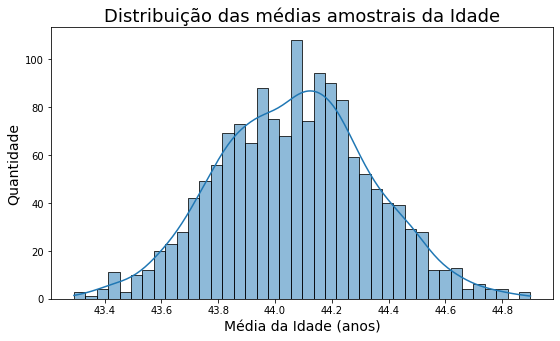

In [64]:
# verifica se a distribuição das médias amostrais da idade se aproxima da distribuição normal
ax = sns.histplot(data=amostras.mean(), bins=40, kde=True)

ax.figure.set_size_inches(9, 5)
plt.title('Distribuição das médias amostrais da Idade', fontsize=18)
plt.xlabel('Média da Idade (anos)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

> O Teorema do Limite Central afirma que, _"com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30"_.

In [65]:
# média da idade na população
df.idade.mean()

44.07142113482561

In [66]:
# média das médias amostrais da idade
amostras.mean().mean()

44.06984499999997

> O Teorema do Limite Central afirma que, _"com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30_".

$$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [67]:
# desvio padrão da distribuição de médias amostrais da idade
amostras.mean().std()

0.2683358061799661

In [68]:
# desvio padrão da variável original (idade da população)
df.idade.std()

12.480583465360187

In [69]:
# verifica a relação entre desvio padrão da variável original e desvio padrão da distribuição de médias
df.idade.std() / np.sqrt(n)

0.2790743302740527

### 4.2 Níveis de confiança e significância

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

<img src='https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/formacao_ds/imagens/aula3_4-2_niveis_confianca_e_significancia.png' width='30%'>

### 4.3 Erro inferencial

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

$$e = z \frac{\sigma}{\sqrt{n}}$$

### 4.4 Intervalos de confiança

#### 4.4.1 Intevalo de confiança para a média da população $\mu$

- Com desvio padrão populacional conhecido: $\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$

- Com desvio padrão populacional desconhecido: $\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$

onde $\bar{x}$ é a média da amostra, $\sigma$ é o desvio padrão populacional e $s$ é o desvio padrão da amostra.


### 4.5 Exemplo

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

In [70]:
# média amostral (valor dado pelo enunciado)
media_amostral = 5050
media_amostral

5050

In [71]:
# nivel de significancia (valor dado pelo enunciado)
significancia = 0.05
significancia

0.05

In [72]:
# nivel de confiança
confianca = 1 - significancia
confianca

0.95

**Obtendo o $z$**

<img src='https://raw.githubusercontent.com/brnocesar/learning-data-analysis/main/formacao_ds/imagens/aula3_4-5_intervalo_confianca.png' width='30%'>

Na imagem já temos os valores dos limites e agora vamos ver como encontrá-los, primeiro usando a tabela padronizada e depois usando a função `ppf()` o `scipy`. Sabendo que a distribuição é simétrica e meu intervalo de confiança é de 95% (ou seja, 95% dos valores estão dentro da área destacada e limitada pelos limites indicados), basta encontrar a a metada da área destacada e somar $0,5$ a esse valor para poder encontrar o valor do limite superior na tabela padronizada.

Novamente, como se trata de uma distribuição simétrica, o limite inferior terá o mesmo valor que o limite superior, porém sinal oposto.

In [73]:
probabilidade_lim_sup = 0.5 + (confianca / 2)
probabilidade_lim_sup

0.975

In [74]:
# escreve no mesmo formato da tabela padronizada
probabilidade_lim_sup_str = str(f"{probabilidade_lim_sup:.4f}")
probabilidade_lim_sup_str

'0.9750'

In [75]:
# seleciono apenas a linha que me interessa para obter z na tabela padronizada
tabela_normal_padronizada.loc[
    (pd.to_numeric(tabela_normal_padronizada['0.00']) < probabilidade_lim_sup) 
    & (pd.to_numeric(tabela_normal_padronizada['0.09']) > probabilidade_lim_sup)
]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767


In [76]:
# mantenho apenas a probabilidade que estou procurando
valor_z_df = tabela_normal_padronizada[tabela_normal_padronizada == probabilidade_lim_sup_str].dropna(how='all', axis=0).dropna(axis=1)
valor_z_df

Z,0.06
1.90,0.9750


In [77]:
z = float(valor_z_df.index[0]) + float(valor_z_df.columns[0])
z

1.96

In [78]:
z = stats.norm.ppf(probabilidade_lim_sup)
z

1.959963984540054

In [79]:
# arredondando o z
z = round(z, 2)
z

1.96

Abaixo temos uma tabela com os valores de $z$ para os níveis de confiança mais utilizados:

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:-:|:-:|:-:|
|90%|0,95|1,645|
|95%|0,975|1,96 |
|99%|0,995|2,575|

In [80]:
# obtendo erro padrao da média (o desvio padrão populacional é um valor dado pelo enunciado)
desvio_padrao = 150
desvio_padrao

150

In [81]:
# tamanho da amostra (informação dada pelo enunciado)
n = 20
n

20

In [82]:
# obtendo o erro inferencial
erro = z * (desvio_padrao / np.sqrt(n))
erro

65.7403985384938

In [83]:
# calculando intervalo de confiança para a média de forma manual
intervalo = (media_amostral - erro, media_amostral + erro)
intervalo

(4984.2596014615065, 5115.7403985384935)

In [84]:
# calculando intervalo de confiança para a média
stats.norm.interval(alpha=0.95, loc=media_amostral, scale=desvio_padrao/np.sqrt(n))

(4984.260809456757, 5115.739190543243)

## 5 Cálculo do tamanho da amostra

### 5.1 Variáveis quantitativas e população infinita

Vamos calcular o tamanho da amostra para que ela seja realmente representativa da população que estamos estudando.

Para isso vamos utilizar o _erro inferencial_ $e$ e o $z$ de _distribuição de probabilidade normal_. A partir da fórmula do erro inferencial podemos obter o tamanho da amostra ideal

$$e = z \frac{\sigma}{\sqrt{n}}$$

Com desvio padrão conhecido: $n = \left(z\frac{\sigma}{e}\right)^2$

Com desvio padrão desconhecido: $n = \left(z\frac{s}{e}\right)^2$

Onde:

- $z$ é a variável normal padronizada
- $\sigma$ é o desvio padrão populacional
- $s$ o desvio padrão amostral
- e $e$ é o erro inferencial

**Observações**

1. O desvio padrão ($\sigma$ ou $s$) e o erro ($e$) devem estar na mesma unidade de medida.
2. Quando o erro ($e$) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

#### 5.1.1 Exemplo

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R\$ 100,00**. Sabemos que o **desvio padrão populacional** da renda deste grupo de trabalhadores é de **R\$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

Trazendo novamente a tabela apresentada acima com o valor de $z$ para os níves de confiança mais utilizados temos:

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:-:|:-:|:-:|
|90%|0,95|1,645|
|95%|0,975|1,96 |
|99%|0,995|2,575|

In [85]:
# valor de z 
z = 1.96
z

1.96

In [86]:
# valor do desvio padrão (populacional) é dado pelo enunciado
sigma = 3323.39
sigma

3323.39

In [87]:
# erro inferencial, tambem é um dado do enunciado
e = 100
e

100

In [88]:
# aplicamos a fórmula para obter n
n = round((z * (sigma / e))**2)
n

4243

### 5.2 Variáveis quantitativas e população finita

As fórmulas usadas para populações finitas são um pouco mais complexas pois possuem um "fator de correção" para populações finitas, necessário para relativizar o tamanho da amostra com o tamanho da população.

Com desvio padrão conhecido

$$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

Com desvio padrão desconhecido

$$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

- $N$ é o tamanho da população
- $z$ é a variável normal padronizada
- $\sigma$ é o desvio padrão populacional
- $s$ o desvio padrão amostral
- e $e$ é erro inferencial

#### 5.2.1 Exemplo

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

In [89]:
N = 10000
N

10000

In [90]:
confianca = 0.95
confianca

0.95

In [91]:
z = stats.norm.ppf(0.5 + (confianca/2))
z = round(z, 2)
z

1.96

In [92]:
s = 12
s

12

In [93]:
e = 5
e

5

In [94]:
n = ((z**2) * (s**2) * N) / (((z**2) * (s**2)) + ((e**2) * (N-1)))
n = round(n)
n

22

## 6 Fixando o conteúdo

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R\$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R\$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R\$ 1.082,79** e que a **média populacional** é de **R\$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

Começamos selecionado as linhas com valor de `renda` até R\$ 5.000,00 e já calculamos o desvio padrão e a média

In [95]:
renda_5k = df.query("renda <= 5000").renda
renda_5k

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: renda, Length: 72109, dtype: int64

In [96]:
sigma = renda_5k.std()
sigma

1082.794549030635

In [97]:
media = renda_5k.mean()
media

1426.5372144947232

considerando nossa população como tendo tamanho infinito, determinamos o tamanho da amostra representativa para um nível de confiança de 95%

In [98]:
z = stats.norm.ppf(0.5 + (0.95/2))
e = 10

n = (z * (sigma/e))**2
n = round(n)
n

45039

verifico o intervalo de confiança para a média

In [99]:
intervalo = stats.norm.interval(alpha=0.95, loc=media, scale=sigma/np.sqrt(n))
intervalo

(1416.5372195108241, 1436.5372094786223)

In [100]:
(media - e, media + e)

(1416.5372144947232, 1436.5372144947232)

Vamos gerar 1000 amostras e plotar a dispersão da renda média nessas amostras para verificarmos gráficamente o que estamos falando sobre intervalo de confiança:

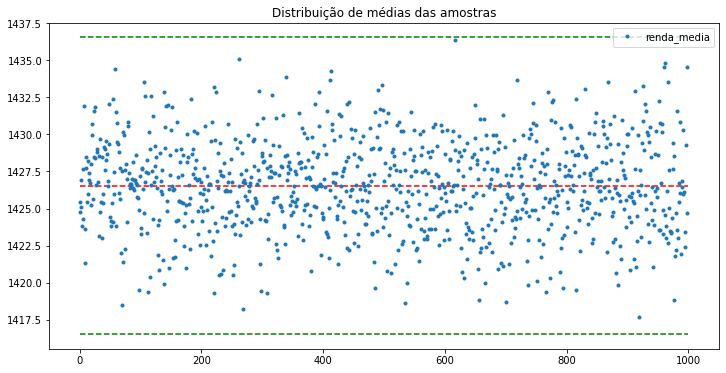

In [101]:
tamanho_simulacao = 1000
medias = [renda_5k.sample(n=n).mean() for _ in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)
medias.columns = ['renda_media']
medias

ax = medias.plot(style='.')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de médias das amostras')
ax.hlines(y=media,        xmin=0, xmax=tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y=intervalo[0], xmin=0, xmax=tamanho_simulacao, colors='green', linestyles='dashed')
ax.hlines(y=intervalo[1], xmin=0, xmax=tamanho_simulacao, colors='green', linestyles='dashed')
bx = ax

## 7 Projeto

### 7.1 Proporção de homens e mulheres

Avaliando nosso dataset é possível verificar que a **proporção de homens** como chefes de domicílios é de quase **70%**. Precisamos **selecionar aleatoriamente grupos de 10 indivíduos** para verificar as diferenças entre os rendimentos em cada grupo. 

1. Verifique a real proporção de homens e mulheres em nosso dataset.
2. Determine qual tipo de distribuição de probabilidade se encaixa neste experimento.
3. Qual a **probabilidade de selecionamos um grupo que apresente a mesma proporção da população**, ou seja, selecionarmos um grupo que seja **composto por 7 homens e 3 mulheres**?


In [102]:
# proporção de cada sexo no dataset, sabendo que o valor 0 representa homens
pd.DataFrame({'Proporção (%)': (df.sexo.value_counts(normalize=True)*100).round(2)}).rename(index={0: 'Masculino', 1: 'Feminino'})

,Proporção (%)
Masculino,69.3
Feminino,30.7


Esse experimento pode ser representado por uma distribuição **binomial**, pois:

1. _**"Consiste na realização de $n$ ensaios idênticos"**_: onde o ensaio é _selecionar uma pessoa da população verificando qual seu sexo_, e será repetido por 10 vezes;
2. _**"Os ensaios são independentes"**_
3. _**"Somente dois resultados são possíveis"**_: a pessoa selecionada pode ser _homem_ ou _mulher_
4. _**"A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio."**_: onde $p=0,5$ e $q=1-p=0,5$

Podemos calcular a probabilidade de obter sucesso em $k$ de $n$ ensaios com a fórmula:

$$ P(k)=\binom{n}{k} p^k q^{n-k} $$

Onde:

- $\binom{n}{k}$ é o número de combinações possíveis de $n$ objetos, tomados $k$ a cada vez. Lê-se _"combinação de n k a k"_ e pode ser calculado com a fórmula: $\binom{n}{k} = C_{k}^{n} = \frac{n!}{k!(n - k)!}$
- $p$ a probabilidade de sucesso;
- $q = (1 - p)$ a probabilidade de fracasso;
- $n$ o número de eventos estudados; e
- $k$ é o número de eventos desejados que tenham sucesso

In [103]:
# probabilidade de selecionar uma pessoa do sexo masculino (dado do enunciado)
p = 0.7
p

0.7

In [104]:
# probabilidade de selecionar uma mulher
q = 1-p
q

0.30000000000000004

In [105]:
# numero de eventos desejados de sucesso (homens selecionados)
k = 7
k

7

In [106]:
# número de ensaios (vezes em que vamos selecionar uma pessoa)
n = 10
n

10

In [107]:
# probabilidade de selecionar 7 homens em uma amostra de 10 pessoas, calculando de forma manual
(math.factorial(n) / (math.factorial(k) * math.factorial(n-k))) * (p ** k) * (q ** (n-k))

0.266827932

In [108]:
# calculando de forma um pouco menos manual
special.comb(n, k) * (p ** k) * (q ** (n-k))

0.266827932

In [109]:
# calculando direto
probabilidade = stats.binom.pmf(n=n, k=k, p=p)
probabilidade

0.26682793200000016

### 7.2 Grupos com a proporção desejada

Ainda sobre a questão anterior, **quantos grupos de 10 indivíduos** nós precisaríamos selecionar, de forma aleatória, para conseguir **100 grupos compostos por 7 homens e 3 mulheres**? (Lembre-se da forma de cálculo da média de uma distribuição binomial)

O _valor esperado_ ou a _média da distribuição binomial_ é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento

$$\mu = n \; p$$

No caso, temos a média de experimentos realizados em que temos o resultado desejado, que é $\mu=100$, e a probabilidade de ocorrência desse evento $p=0.27$

In [110]:
# número de grupos que queremos selecionar com 7 homens e 3 mulheres
media = 100
media

100

In [111]:
# probabilidade de selecionar um grupo com 7 homens e 3 mulheres (calculado no exercício anterior)
probabilidade

0.26682793200000016

In [112]:
# número de grupos que precisamo selecionar
n = media / probabilidade
n = round(n)
n

375

### 7.3 Uma nova pesquisa

Um cliente nos encomendou um estudo para avaliar o **rendimento dos chefes de domicílio no Brasil**. Para isso precisamos realizar uma nova coleta de dados, isto é, uma nova pesquisa de campo.

Após reunião com o cliente foi possível elencar o seguinte conjunto de informações:

- O resultado da pesquisa precisa estar pronto em **2 meses**;
- Teremos somente **R\$ 150.000,00** de recursos para realização da pesquisa de campo; e
- Seria interessante uma **margem de erro não superior a 10% em relação a média estimada**.

Em nossa experiência com estudos deste tipo, sabemos que o **custo médio por indivíduo entrevistado fica em torno de R\$ 100,00**. Com base nisso, avalie e obtenha o seguinte conjunto de informações para passar ao cliente:

#### 7.3.1 Amostra

Para obter uma estimativa para os parâmetros da população (renda dos chefes de domicílio no Brasil), realize uma amostragem aleatória simples em nosso conjunto de dados. Essa amostra deve conter 200 elementos. Obtenha a média e o desvio-padrão dessa amostra.

In [113]:
# amostra com 200 elementos
amostra = df.renda.sample(n=200, random_state=random_state_geral)

In [114]:
media_amostra = amostra.mean()
media_amostra

1964.205

In [115]:
sigma_amostra = amostra.std()
sigma_amostra

3139.8855167452157

#### 7.3.2 Tamanhos de amostra

Para a **margem de erro** especificada pelo cliente obtenha os **tamanhos de amostra** necessários para garantir os **níveis de confiança de 90%, 95% e 99%**.

- primeiro devemos escrever a margem de erro na mesma unidade de medida da média, basta seguir o requisito passado pelo cliente _"uma margem de erro não superior a 10% em relação a média estimada"_.
- depois lembramos que _"o nível de confiança ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o nível de significância ($\alpha$) expressa a probabilidade de erro da estimativa"_
- a relação entre essas grandezas e o tamanho da amostra é dada por $e = z \; \frac{\sigma}{\sqrt{n}} \Rightarrow n = (z \; \frac{\sigma}{e})^2 $
- e a probabilidade referente ao nível de confiança usada para obter $z$ é $p = 0,5 + \frac{(1 - \alpha)}{2}$. Sendo que já temos uma tabela para os valores de $z$ dos níveis de confiança mais utilizados, que coincidentemente são os mesmos pedidos pelo enunciado 

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:-:|:-:|:-:|
|90%|0,95|1,645|
|95%|0,975|1,96 |
|99%|0,995|2,575|

In [116]:
# margem de erro em moeda
e = 0.1 * media_amostra
e

196.4205

In [117]:
# calcula z para nível de confiança de 90%
z_90 = stats.norm.ppf(0.5 + (0.9)/2)
z_90

1.6448536269514722

In [118]:
# tamanho necessário da amostra para garantir o nível de confiança em 90%
n_90 = (z_90 * (sigma_amostra/e))**2
n_90 = round(n_90)
n_90

691

In [119]:
# calcula z para nível de confiança de 95%
z_95 = stats.norm.ppf(0.5 + (0.95)/2)
z_95

1.959963984540054

In [120]:
# tamanho necessário da amostra para garantir o nível de confiança em 95%
n_95 = (z_95 * (sigma_amostra/e))**2
n_95 = round(n_95)
n_95

982

In [121]:
# calcula z para nível de confiança de 99%
z_99 = stats.norm.ppf(0.5 + (0.99)/2)
z_99

2.5758293035489004

In [122]:
# tamanho necessário da amostra para garantir o nível de confiança em 99%
n_99 = (z_99 * (sigma_amostra/e))**2
n_99 = round(n_99)
n_99

1695

#### 7.3.3 Custo das amostras

Obtenha o **custo da pesquisa** para os três níveis de confiança.

In [123]:
custo_entrevista = 100
custo_entrevista

100

In [124]:
# custo da pesquisa para garantir o nível de confiança em 90%
custo_90 = n_90 * custo_entrevista
custo_90

69100

In [125]:
# custo da pesquisa para garantir o nível de confiança em 95%
custo_95 = n_95 * custo_entrevista
custo_95

98200

In [126]:
# custo da pesquisa para garantir o nível de confiança em 90%
custo_90 = n_90 * custo_entrevista
custo_90

69100

#### 7.3.4 Intervalo de confiança

Para o maior nível de confiança viável (dentro do orçamento disponível), obtenha um **intervalo de confiança para a média da população**.

In [127]:
# lembrando que o parâmetro alpha se refere ao nível de confiança, denotado como 1-alpha, enquanto que a letra grega alpha denota o nível de significância
intervalo_95 = stats.norm.interval(alpha=0.95, loc=media_amostra, scale=sigma_amostra/np.sqrt(n_95))
intervalo_95

(1767.820973280509, 2160.589026719491)

#### 7.3.5 Margem de erro

Assumindo o **nível de confiança escolhido no item anterior**, qual **margem de erro** pode ser considerada utilizando todo o recurso disponibilizado pelo cliente?

In [128]:
# recursos disponíveis para a pesquisa
recursos_pesquisa = 150000
recursos_pesquisa

150000

In [129]:
# número máximo de entrevistas possíveis usando todo recurso
n_max = recursos_pesquisa / custo_entrevista
n_max

1500.0

In [130]:
# novo erro em unidade de moeda
e = z_95 * (sigma_amostra / np.sqrt(n_max))
e

158.89721122673737

In [131]:
erro_percentual = (e / media_amostra)*100
f"{erro_percentual:.2f}%"

'8.09%'

#### 7.3.6 Custo para

Assumindo um **nível de confiança de 95%**, **quanto a pesquisa custaria ao cliente** caso fosse considerada uma **margem de erro de apenas 5%** em relação a média estimada?

In [132]:
# erro para margem de erro de 5%, em unidade de moeda
e = 0.05 * media_amostra
e

98.21025

In [133]:
# tamanho da amostra necessária para garantir o nível de confiança de 95% com margem de erro de 5%
n = (z_95 * (sigma_amostra/e))**2
n = round(n)
n

3927

In [134]:
# custo da pesquisa
n * custo_entrevista

392700